In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hadamard
from scipy.optimize import curve_fit
#from google.colab import files


In [4]:
# N = 4   # Number of neurons
# p = 3   # number of memories
# H = hadamard(N) # NxN matrix
# memory = H[:, :p]
# print(H)
# print(memory)

In [5]:
N = 256 # Number of neurons
H = hadamard(N)    # NxN matrix
num_iteration = 50
T = 20
T_series = np.linspace(1,T,T)
N_series = np.linspace(1,N,N)

In [6]:
def inverted_logistic_function(x, L, k, x0):
    return L - L / (1 + np.exp(-k * (x - x0)))

def custom_sign(z):
    return np.where(z >= 0, 1, -1)

def network_simulation(S_initial, memory, T):
    weight_matrix = 1/N * memory @ memory.T  # @:Matrix multiplication. Nxp @ pxN = NxN
    np.fill_diagonal(weight_matrix, 0)
    n_positive = []  # number of positive elements
    S_out = S_initial
    for i in range(T):
        n_positive.append(np.sum(S_out >= 0))
        S_out = custom_sign(weight_matrix @ S_out)
        # print('S_out',S_out)
    return S_out, n_positive

def correlation_calculator(S_out, memory):
    corr = []
    p = memory.shape[1]
    for i in range(p):
        corr.append(np.abs(np.dot(S_out.flatten(),memory[:,i].flatten())/N)) # Nx1 -> N
    return corr
recall = []
noise_level = 3
for i in range(1,N+1):
    memory = H[:, :i]  # Nxi matrix
    success_count = 0  # Count of successful retrievals
    for j in range(num_iteration):
        pattern_index = np.random.randint(i)
        S_initial = memory[:,pattern_index] + noise_level * np.random.randn(N,)
        S_initial = custom_sign(S_initial)

        S_out, n_positive = network_simulation(S_initial, memory, T)
        if np.array_equal(S_out, memory[:, pattern_index]) or np.array_equal(S_out, -memory[:, pattern_index]):
            success_count += 1
    success_rate = success_count / num_iteration
    recall.append(success_rate)



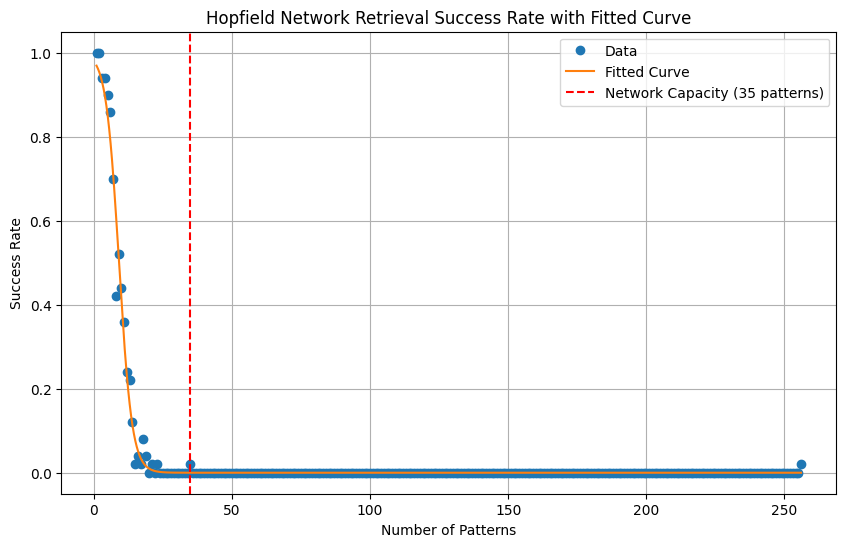

In [7]:
max_patterns = int(0.138 * N)
x_data = N_series  # Number of patterns
y_data = recall    # Success rate
initial_guesses = [1, 0.1, N/2]  # L, k, x0
popt, pcov = curve_fit(
    inverted_logistic_function,
    x_data,
    y_data,
    p0=initial_guesses,
    bounds=(0, [1., 10., N])
)
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = inverted_logistic_function(x_fit, *popt)

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label='Data')
plt.plot(x_fit, y_fit, '-', label='Fitted Curve')
plt.xlabel('Number of Patterns')
plt.ylabel('Success Rate')
plt.title('Hopfield Network Retrieval Success Rate with Fitted Curve')
plt.grid(True)

# Add vertical dashed line at max_patterns
plt.axvline(
    x=max_patterns,
    color='r',
    linestyle='--',
    label=f'Network Capacity ({max_patterns} patterns)'
)
plt.legend()
plt.show()


In [10]:
#uploaded = files.upload()

y05 = np.load("noise=0.5.npy")
y1 = np.load("noise=1.npy")
y2 = np.load("noise=2.npy")
y3 = np.load("noise=3.npy")

popt05, pcov = curve_fit(
    inverted_logistic_function,
    x_data,
    y05,
    p0=initial_guesses,
    bounds=(0, [1., 10., N])
)
popt1, pcov = curve_fit(
    inverted_logistic_function,
    x_data,
    y1,
    p0=initial_guesses,
    bounds=(0, [1., 10., N])
)
popt2, pcov = curve_fit(
    inverted_logistic_function,
    x_data,
    y2,
    p0=initial_guesses,
    bounds=(0, [1., 10., N])
)
popt3, pcov = curve_fit(
    inverted_logistic_function,
    x_data,
    y3,
    p0=initial_guesses,
    bounds=(0, [1., 10., N])
)
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit_05 = inverted_logistic_function(x_fit, *popt05)
y_fit_1 = inverted_logistic_function(x_fit, *popt1)
y_fit_2 = inverted_logistic_function(x_fit, *popt2)
y_fit_3 = inverted_logistic_function(x_fit, *popt3)



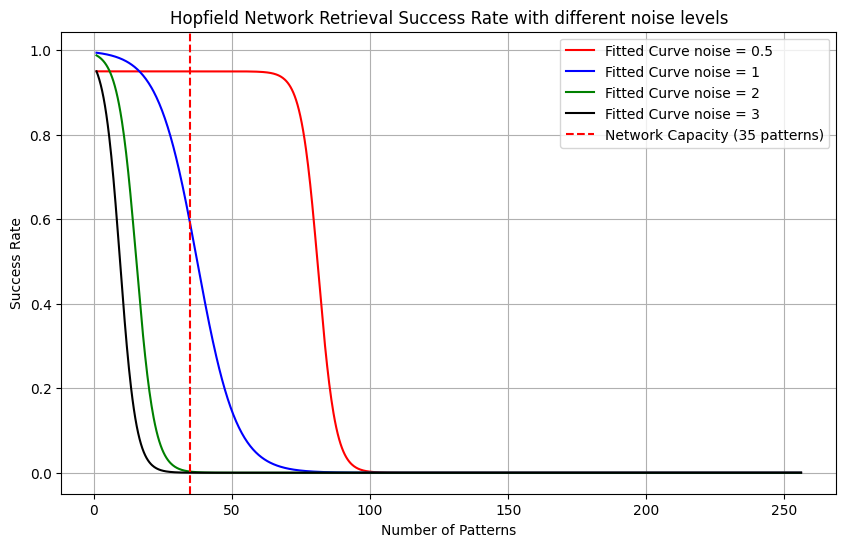

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(x_fit, y_fit_05, '-', label='Fitted Curve noise = 0.5' , color = "red")
plt.plot(x_fit, y_fit_1, '-', label='Fitted Curve noise = 1' , color = "blue")
plt.plot(x_fit, y_fit_2, '-', label='Fitted Curve noise = 2' , color = "green")
plt.plot(x_fit, y_fit_3, '-', label='Fitted Curve noise = 3' , color = "black")
plt.xlabel('Number of Patterns')
plt.ylabel('Success Rate')
plt.title('Hopfield Network Retrieval Success Rate with different noise levels')
plt.grid(True)
plt.axvline(
    x=max_patterns,
    color='r',
    linestyle='--',
    label=f'Network Capacity ({max_patterns} patterns)'
)
plt.legend()
plt.show()



